# Quantum Measurement Postulates
### For class 2025 spring "Introduction to quantum information and quantum computing" Seoul National University, Department of Physics and Astronomy Instructor: Dohun Kim 

## Quantum Measurement

In this example, we examine if measurement of a real qubit respects the measurement postulate of the quantum mechanics. In the previous examples, we already saw that the measurement of a qubit is consistent with Born rule: probability amplitude squared is probability. Here we examine whether the state after measurement indeed collapses to the measured basis state.  

### Step 1: Create quantum circuit

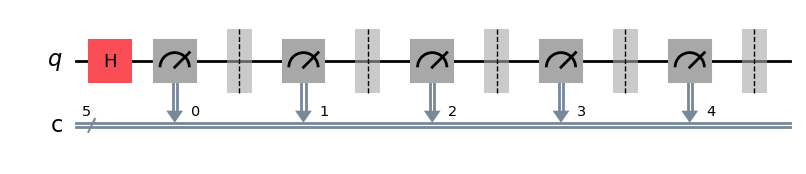

In [6]:
# loading necessary packages
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter 

# Define registers
qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(5, 'c')
qc = QuantumCircuit(qr, cr)

# Initialize the qubit to be a mixture of 0 and 1 states.
qc.h(0)

# Add a first measurement
qc.measure(0,0)
qc.barrier()

# Add a second measurement
qc.measure(0,1)
qc.barrier()

# Add a third measurement
qc.measure(0,2)
qc.barrier()

# Add a fourth measurement
qc.measure(0,3)
qc.barrier()

# Add a fifth measurement
qc.measure(0,4)
qc.barrier()

qc.draw("mpl")

### Step 2: Optimize problem for quantum execution

As seen in the previous example, to run our experiment on a real quantum computer, we need to load Qiskit Runtime Service, and select a quantum computer (or a "backend"). Below, we simply select the least busy quantum computer available to us.

In [7]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService #Import necessary packages
token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=token) 

# Use the least busy backend
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits = 1)
print(backend.name)

ibm_kyiv


We now must transpile the circuit, meaning we must map our circuit onto the base gates available to our chosen quantum computer, and we want to optimize our circuit for running on that quantum computer.

In [8]:
# Transpile the circuit and optimize for running on the quantum computer selected
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
qc_ibm = pm.run(qc)

### Step 3: Execute using Qiskit Runtime Primitives

Now we want to run this on a real quantum computer. All the necessary syntax for that is in the code block below.

In [ ]:
# Specify that we want to use only a single shot, to represent a single measurement of a spin in a SG device.
num_shots = 1

# Load the Runtime primitive and session
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler

# Evaluate the problem using a QPU via Qiskit IBM Runtime
with Session(backend) as session:
    sampler = Sampler(mode = session)
    dist = sampler.run([qc_ibm], shots = num_shots).result()
session.close()
counts = dist[0].data.c.get_counts()

If you have exhausted your allotted time on real quantum computers, or if you are without an internet connection, you can use the next code block, which will run the code on a local simulator.

In [22]:
# This uses a local simulator
from qiskit_aer import AerSimulator

# This generates a simulator that mimics the real quantum system
backend_sim = AerSimulator.from_backend(backend)

# Import an estimator for local simulator from qiskit
from qiskit.primitives import BackendSamplerV2
sampler = BackendSamplerV2(backend = backend_sim)
num_shots = 1000

# This runs the job and retrieves the measurement count number from each circuit
dist = sampler.run([qc_ibm], shots = num_shots).result()[0]
counts_raw = dist.data.c.get_counts()
from qiskit.result import QuasiDistribution
counts = QuasiDistribution({outcome: freq / num_shots for outcome, freq in counts_raw.items()})

In [18]:
counts

{0: 0.49, 31: 0.501, 8: 0.003, 1: 0.004, 2: 0.001, 16: 0.001}

### Step 4: Post-processing and classical analysis

For this very simple experiment, classical analysis just consists of visualizing the experimental outcome.

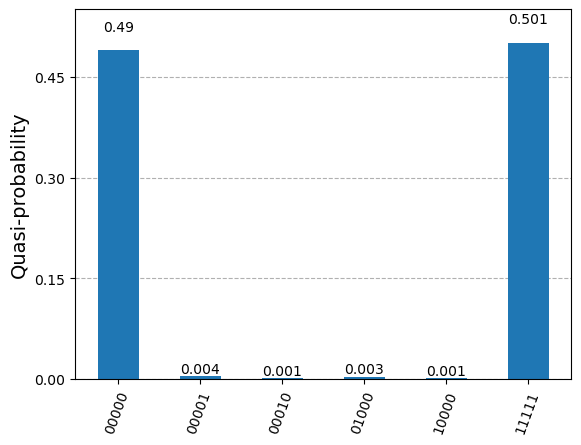

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(counts.binary_probabilities())

#### Discussions:
<details>
<summary>
Examine whether successive measurement, after the first measurement, is as expected from the measurement postulate.

<details>
<summary>
Explain reasons for having small but non-zero unexpected results. 